In [1]:
import pandas as pd

# Load the cleaned BB posts and comments data
bb_posts = pd.read_csv("bb_posts_clean_final.csv")
bb_comments = pd.read_csv("bb_comments_clean_final.csv")

print(bb_posts.shape)
print(bb_comments.shape)
bb_posts.head()
bb_comments.head()

(10155, 9)
(10146, 8)


,Comment ID,Post ID,Category,Comment Author,Comment Date,Comment Content,Comment Support,Post URL
0,555887_c64bc84efa3,555887,anxiety,Johnny_,01-01-2023,"hello everyone, happy new year!im hoping someo...",0,https://forums.beyondblue.org.au/t5/anxiety/mu...
1,581558_caeab9cd1ea,581558,anxiety,K-J-S,01-01-2024,im wondering if anyone else feels like this? i...,1,https://forums.beyondblue.org.au/t5/anxiety/dr...
2,581593_c46908aa953,581593,anxiety,More than my mental health condition,01-01-2024,i feel like i need some support from people in...,0,https://forums.beyondblue.org.au/t5/anxiety/bu...
3,581626_ccba749e49f,581626,anxiety,burntlibraryofalexandria,01-01-2024,every year around this time i get a huge exist...,2,https://forums.beyondblue.org.au/t5/anxiety/sh...
4,581561_c6a4250e0d7,581561,anxiety,Richju,01-01-2024,"hi everyone,i wonder if anyone has overcome th...",1,https://forums.beyondblue.org.au/t5/anxiety/pa...


In [3]:
print(bb_posts.columns)
print(bb_comments.columns)

Index(['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date',
       'Post Content', 'Support Count', 'Total Number of Comments',
       'Post URL'],
      dtype='object')
Index(['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date',
       'Comment Content', 'Comment Support', 'Post URL'],
      dtype='object')


In [4]:
import re


def clean_text(text):
    if pd.isnull(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply to both posts and comments
bb_posts['content_clean'] = bb_posts['Post Content'].apply(clean_text)
bb_comments['content_clean'] = bb_comments['Comment Content'].apply(clean_text)

# Inspect result
print(bb_posts['content_clean'].head())
print(bb_comments['content_clean'].head())

0    hello everyone happy new yearim hoping someone...
1    i feel like i need some support from people in...
2    im wondering if anyone else feels like this i ...
3    every year around this time i get a huge exist...
4    hi everyonei wonder if anyone has overcome the...
Name: content_clean, dtype: object
0    hello everyone happy new yearim hoping someone...
1    im wondering if anyone else feels like this i ...
2    i feel like i need some support from people in...
3    every year around this time i get a huge exist...
4    hi everyonei wonder if anyone has overcome the...
Name: content_clean, dtype: object


In [5]:
import nltk

nltk.download('punkt')


def tokenize_text(text):
    # Tokenize the cleaned text into words
    return nltk.word_tokenize(text)


# Apply to both posts and comments
bb_posts['tokens'] = bb_posts['content_clean'].apply(tokenize_text)
bb_comments['tokens'] = bb_comments['content_clean'].apply(tokenize_text)

# Inspect result
print(bb_posts['tokens'].head())
print(bb_comments['tokens'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [hello, everyone, happy, new, yearim, hoping, ...
1    [i, feel, like, i, need, some, support, from, ...
2    [im, wondering, if, anyone, else, feels, like,...
3    [every, year, around, this, time, i, get, a, h...
4    [hi, everyonei, wonder, if, anyone, has, overc...
Name: tokens, dtype: object
0    [hello, everyone, happy, new, yearim, hoping, ...
1    [im, wondering, if, anyone, else, feels, like,...
2    [i, feel, like, i, need, some, support, from, ...
3    [every, year, around, this, time, i, get, a, h...
4    [hi, everyonei, wonder, if, anyone, has, overc...
Name: tokens, dtype: object


In [6]:
# Add token count column

bb_posts['token_count'] = bb_posts['tokens'].apply(len)
bb_comments['token_count'] = bb_comments['tokens'].apply(len)

# Inspect result
print(bb_posts[['tokens', 'token_count']].head())
print(bb_comments[['tokens', 'token_count']].head())

                                              tokens  token_count
0  [hello, everyone, happy, new, yearim, hoping, ...         1177
1  [i, feel, like, i, need, some, support, from, ...         1082
2  [im, wondering, if, anyone, else, feels, like,...          826
3  [every, year, around, this, time, i, get, a, h...          783
4  [hi, everyonei, wonder, if, anyone, has, overc...         1661
                                              tokens  token_count
0  [hello, everyone, happy, new, yearim, hoping, ...          158
1  [im, wondering, if, anyone, else, feels, like,...          246
2  [i, feel, like, i, need, some, support, from, ...          189
3  [every, year, around, this, time, i, get, a, h...          186
4  [hi, everyonei, wonder, if, anyone, has, overc...          105


In [7]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))


def remove_stopwords(tokens):
    # Remove stop words from a list of tokens
    return [word for word in tokens if word not in stop_words]


# Apply to both posts and comments
bb_posts['tokens_nostop'] = bb_posts['tokens'].apply(remove_stopwords)
bb_comments['tokens_nostop'] = bb_comments['tokens'].apply(remove_stopwords)

# Inspect result
print(bb_posts['tokens_nostop'].head())
print(bb_comments['tokens_nostop'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [hello, everyone, happy, new, yearim, hoping, ...
1    [feel, like, need, support, people, know, fami...
2    [im, wondering, anyone, else, feels, like, rea...
3    [every, year, around, time, get, huge, existen...
4    [hi, everyonei, wonder, anyone, overcome, tend...
Name: tokens_nostop, dtype: object
0    [hello, everyone, happy, new, yearim, hoping, ...
1    [im, wondering, anyone, else, feels, like, rea...
2    [feel, like, need, support, people, know, fami...
3    [every, year, around, time, get, huge, existen...
4    [hi, everyonei, wonder, anyone, overcome, tend...
Name: tokens_nostop, dtype: object


In [8]:
import nltk

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    # Lemmatize each token in the list
    return [lemmatizer.lemmatize(token) for token in tokens]


# Apply to both posts and comments (after stop word removal)
bb_posts['tokens_lemmatized'] = bb_posts['tokens_nostop'].apply(lemmatize_tokens)
bb_comments['tokens_lemmatized'] = bb_comments['tokens_nostop'].apply(lemmatize_tokens)

# Inspect result
print(bb_posts['tokens_lemmatized'].head())
print(bb_comments['tokens_lemmatized'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [hello, everyone, happy, new, yearim, hoping, ...
1    [feel, like, need, support, people, know, fami...
2    [im, wondering, anyone, else, feel, like, real...
3    [every, year, around, time, get, huge, existen...
4    [hi, everyonei, wonder, anyone, overcome, tend...
Name: tokens_lemmatized, dtype: object
0    [hello, everyone, happy, new, yearim, hoping, ...
1    [im, wondering, anyone, else, feel, like, real...
2    [feel, like, need, support, people, know, fami...
3    [every, year, around, time, get, huge, existen...
4    [hi, everyonei, wonder, anyone, overcome, tend...
Name: tokens_lemmatized, dtype: object


In [10]:
# Save processed data

bb_posts.to_csv("bb_posts_preprocessed.csv", index=False)
bb_comments.to_csv("bb_comments_preprocessed.csv", index=False)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


OSError: [Errno 28] No space left on device

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

bb_posts = pd.read_csv("bb_posts_clean_final.csv")
bb_posts_preprocessed = pd.read_csv("bb_posts_preprocessed.csv")

# Calculate original token counts (before cleaning)
def original_token_count(text):
    if pd.isnull(text):
        return 0
    return len(nltk.word_tokenize(str(text)))

bb_posts['original_token_count'] = bb_posts['Post Content'].apply(original_token_count)

# After cleaning (from preprocessed file)
bb_posts_preprocessed['clean_token_count'] = bb_posts_preprocessed['tokens_lemmatized'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

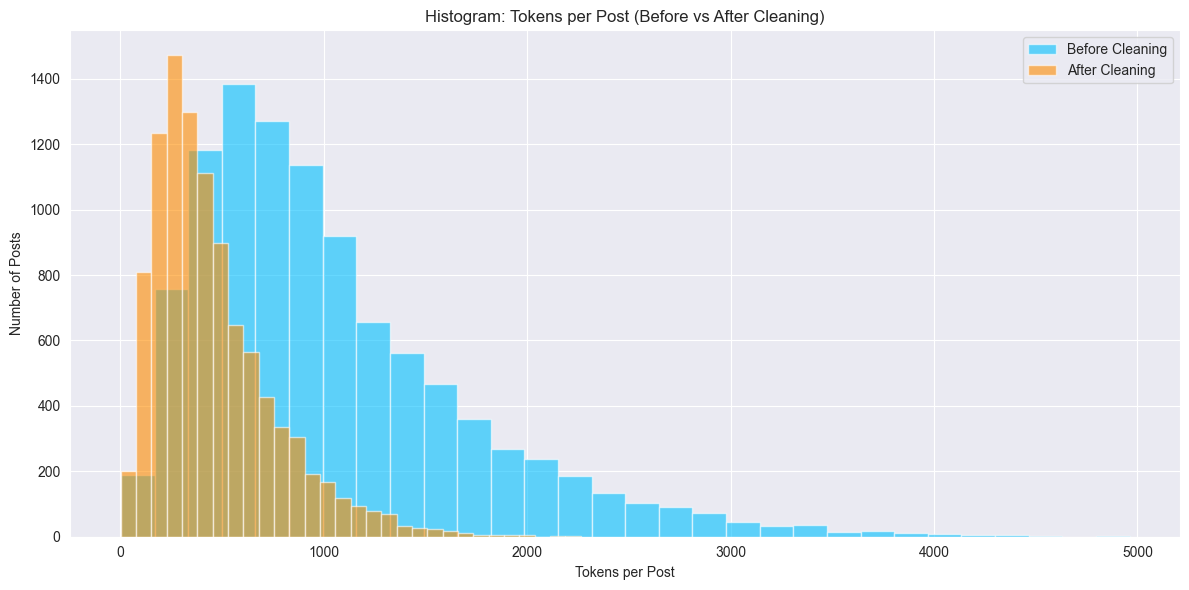

In [2]:
plt.figure(figsize=(12,6))
plt.hist(bb_posts['original_token_count'], bins=30, alpha=0.6, label='Before Cleaning', color='deepskyblue')
plt.hist(bb_posts_preprocessed['clean_token_count'], bins=30, alpha=0.6, label='After Cleaning', color='darkorange')
plt.xlabel('Tokens per Post')
plt.ylabel('Number of Posts')
plt.title('Histogram: Tokens per Post (Before vs After Cleaning)')
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load preprocessed data
bb_posts = pd.read_csv("bb_posts_preprocessed.csv")
reddit_posts = pd.read_csv("reddit_posts_preprocessed.csv")

# If tokens_lemmatized is a string, convert to list
def token_count(x):
    if isinstance(x, str):
        return len(eval(x))
    return 0

bb_token_counts = bb_posts['tokens_lemmatized'].apply(token_count)
reddit_token_counts = reddit_posts['tokens_lemmatized'].apply(token_count)

C:\Users\aipro\AppData\Local\Temp\ipykernel_17664\1028833802.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bb_token_counts, reddit_token_counts], labels=['Beyond Blue', 'Reddit'], patch_artist=True,


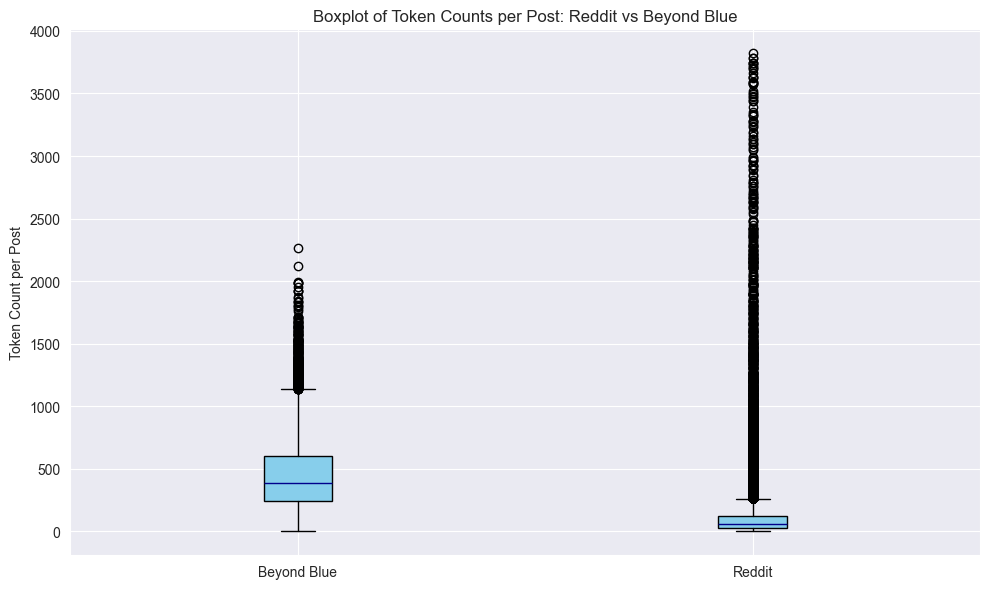

In [4]:
plt.figure(figsize=(10,6))
plt.boxplot([bb_token_counts, reddit_token_counts], labels=['Beyond Blue', 'Reddit'], patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='darkblue'))
plt.ylabel('Token Count per Post')
plt.title('Boxplot of Token Counts per Post: Reddit vs Beyond Blue')
plt.tight_layout()
plt.show()

In [5]:
from collections import Counter
import pandas as pd

bb_posts = pd.read_csv("bb_posts_preprocessed.csv")

# If tokens_nostop is a string, convert to list
def to_tokens(x):
    if isinstance(x, str):
        return eval(x)
    return []

# Flatten all tokens from all posts (before lemmatization)
tokens_before = bb_posts['tokens_nostop'].apply(to_tokens).explode().dropna().tolist()

# Count and display top 20
freq_before = Counter(tokens_before).most_common(20)
print("Top 20 words BEFORE lemmatization:")
for word, count in freq_before:
    print(f"{word}: {count}")

Top 20 words BEFORE lemmatization:
like: 43799
feel: 41208
im: 39097
know: 34191
dont: 31316
time: 29491
get: 27582
people: 27417
would: 27353
help: 26240
really: 25957
one: 23806
think: 23626
things: 22606
also: 22507
life: 21737
want: 20480
much: 19876
hi: 19054
going: 17382


In [6]:
# Flatten all tokens from all posts (after lemmatization)
tokens_after = bb_posts['tokens_lemmatized'].apply(to_tokens).explode().dropna().tolist()

# Count and display top 20
freq_after = Counter(tokens_after).most_common(20)
print("\nTop 20 words AFTER lemmatization:")
for word, count in freq_after:
    print(f"{word}: {count}")


Top 20 words AFTER lemmatization:
feel: 45215
like: 44184
im: 39097
time: 37219
know: 35650
thing: 31962
dont: 31316
help: 29825
get: 29472
people: 28263
would: 27353
one: 26352
really: 25957
think: 24453
life: 23798
year: 22951
want: 22531
also: 22507
way: 21551
feeling: 21503


In [7]:
import pandas as pd

df_freq_before = pd.DataFrame(freq_before, columns=['Word_Before', 'Count_Before'])
df_freq_after = pd.DataFrame(freq_after, columns=['Word_After', 'Count_After'])

df_combined = pd.concat([df_freq_before, df_freq_after], axis=1)
print(df_combined)

   Word_Before  Count_Before Word_After  Count_After
0         like         43799       feel        45215
1         feel         41208       like        44184
2           im         39097         im        39097
3         know         34191       time        37219
4         dont         31316       know        35650
5         time         29491      thing        31962
6          get         27582       dont        31316
7       people         27417       help        29825
8        would         27353        get        29472
9         help         26240     people        28263
10      really         25957      would        27353
11         one         23806        one        26352
12       think         23626     really        25957
13      things         22606      think        24453
14        also         22507       life        23798
15        life         21737       year        22951
16        want         20480       want        22531
17        much         19876       also       

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

bb_posts = pd.read_csv("bb_posts_preprocessed.csv")

def to_tokens(x):
    if isinstance(x, str):
        return eval(x)
    return []

# Get all tokens (flattened list)
tokens_before = bb_posts['tokens_nostop'].apply(to_tokens).explode().dropna().tolist()
tokens_after = bb_posts['tokens_lemmatized'].apply(to_tokens).explode().dropna().tolist()

vocab_size_before = len(set(tokens_before))
vocab_size_after = len(set(tokens_after))

print(f"Vocabulary size BEFORE lemmatization: {vocab_size_before}")
print(f"Vocabulary size AFTER lemmatization: {vocab_size_after}")

Vocabulary size BEFORE lemmatization: 188859
Vocabulary size AFTER lemmatization: 183635


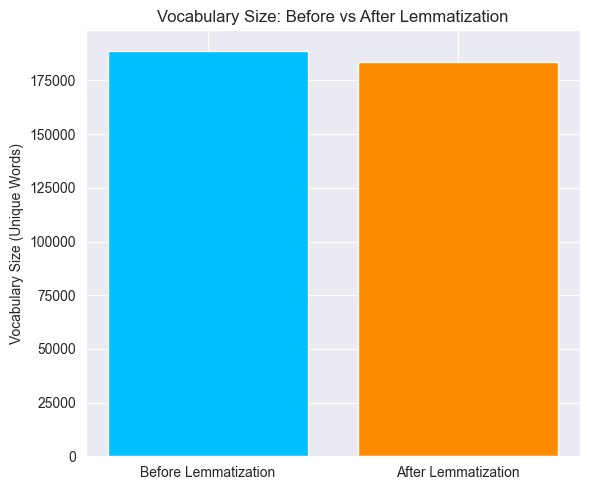

In [9]:
plt.figure(figsize=(6,5))
plt.bar(['Before Lemmatization', 'After Lemmatization'], [vocab_size_before, vocab_size_after],
        color=['deepskyblue', 'darkorange'])
plt.ylabel('Vocabulary Size (Unique Words)')
plt.title('Vocabulary Size: Before vs After Lemmatization')
plt.tight_layout()
plt.show()